# Rockfish Recruitment Trawl Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the dataset
fish = rockfish_data = pd.read_csv("recruitment_trawl_data.csv")

#select only the desired columns
fish = rockfish_data[['time', 'latitude', 'longitude', 'catch', 'common_name']]

#filter for species
fish = fish[fish['common_name'].isin(['BLUE ROCKFISH', 'COPPER ROCKFISH GROUP', 'ROCKFISH, TOTAL YOY'])]

#convert time using pandas
fish['time'] = pd.to_datetime(fish['time'])

#extract yr
fish['year'] = fish['time'].dt.year

# Filter the data for years 2003 to 2023
fish = fish[(fish['year'] >= 2003) & (fish['year'] <= 2019)]

#group by year and species
average_catch_per_year_species = fish.groupby(['year', 'common_name'])['catch'].mean().reset_index()

#save each species group to its own CSV file
for species, group in average_catch_per_year_species.groupby('common_name'):
    file_name = f"{species.replace(' ', '_').replace(',', '').lower()}_yearly_timeseries.csv"
    group.to_csv(file_name, index=False, header=False)

C:\Users\msand\AppData\Local\Temp\ipykernel_10036\208848892.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  fish = rockfish_data = pd.read_csv("recruitment_trawl_data.csv")


In [4]:
# For spatial data, we'll create a new dataframe with just lat/long
spatial_data = fish[['latitude', 'longitude', 'common_name', 'catch', 'year']]

# Export to CSV for QGIS
spatial_data.to_csv('rockfish_spatial_data.csv', index=False)

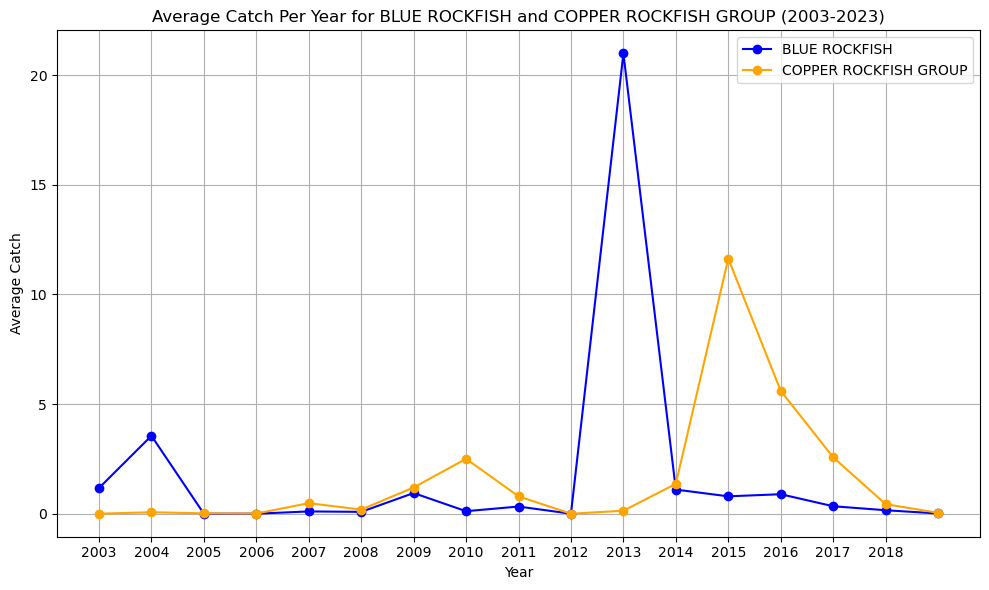

In [5]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot for 'BLUE ROCKFISH'
blue_rockfish = average_catch_per_year_species[average_catch_per_year_species['common_name'] == 'BLUE ROCKFISH']
plt.plot(blue_rockfish['year'], blue_rockfish['catch'], marker='o', linestyle='-', label='BLUE ROCKFISH', color='b')

# Plot for 'COPPER ROCKFISH GROUP'
copper_rockfish = average_catch_per_year_species[average_catch_per_year_species['common_name'] == 'COPPER ROCKFISH GROUP']
plt.plot(copper_rockfish['year'], copper_rockfish['catch'], marker='o', linestyle='-', label='COPPER ROCKFISH GROUP', color='orange')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Catch')
plt.title('Average Catch Per Year for BLUE ROCKFISH and COPPER ROCKFISH GROUP (2003-2023)')
plt.grid(True)
plt.xticks(range(2003, 2019, 1))  # Optional: control the x-ticks to show every year
plt.legend()  # Show the legend
plt.tight_layout()

# Display the plot
plt.show()

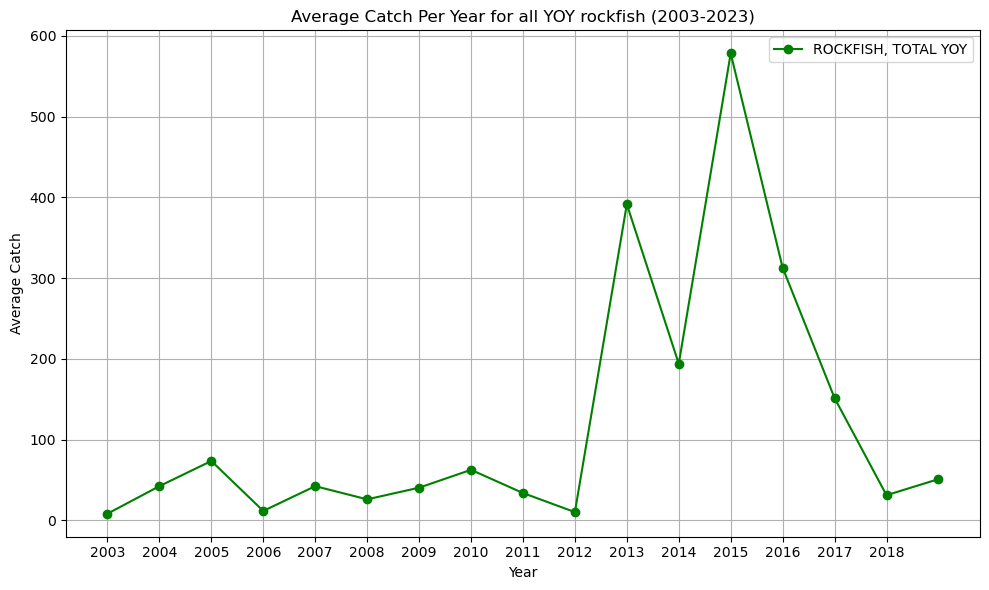

In [6]:
# Plotting the data
plt.figure(figsize=(10, 6))

#plot for total rockfish caught in trawl
total_rockfish = average_catch_per_year_species[average_catch_per_year_species['common_name'] == 'ROCKFISH, TOTAL YOY']
plt.plot(total_rockfish['year'], total_rockfish['catch'], marker='o', linestyle='-', label='ROCKFISH, TOTAL YOY', color='g')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Catch')
plt.title('Average Catch Per Year for all YOY rockfish (2003-2023)')
plt.grid(True)
plt.xticks(range(2003, 2019, 1))  # Optional: control the x-ticks to show every year
plt.legend()  # Show the legend
plt.tight_layout()

# Display the plot
plt.show()